In [1]:
# The typical imports
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.



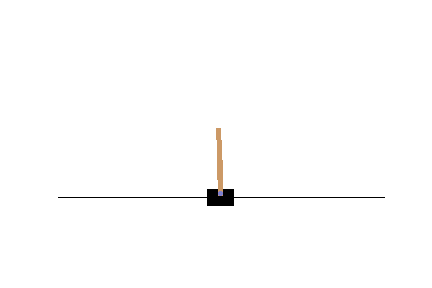
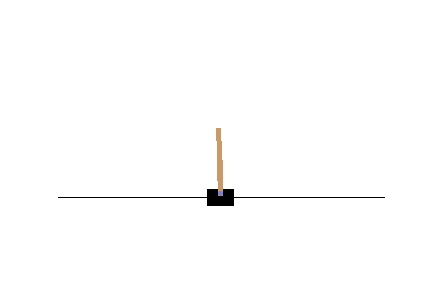
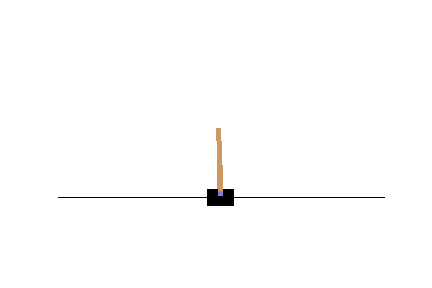
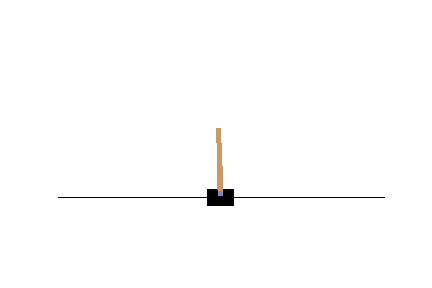
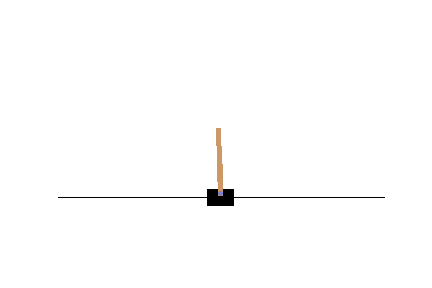
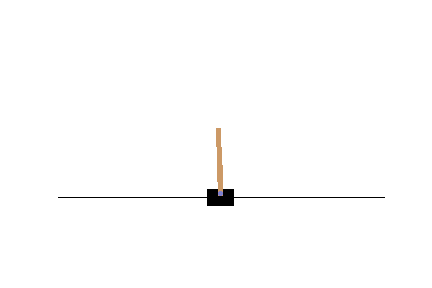
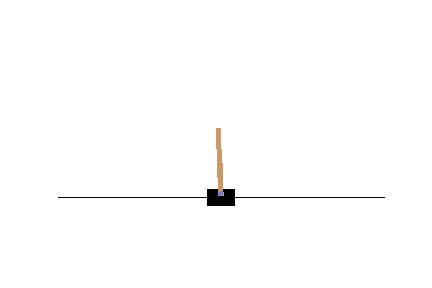
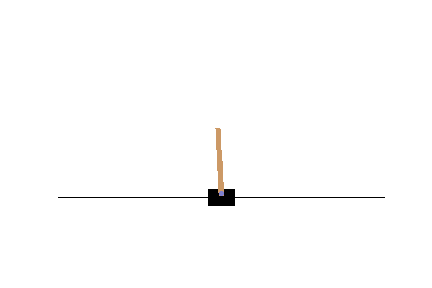
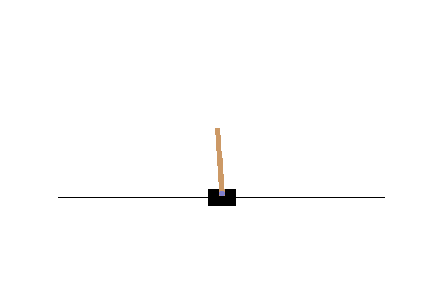
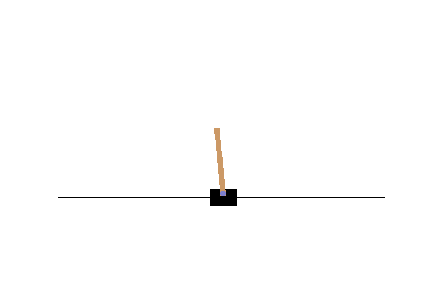
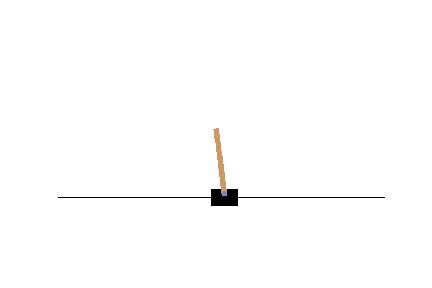
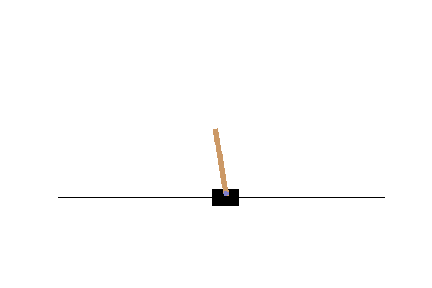

In [3]:
    import sys

    import gym

    from rl.dqn import MLP, DQN
    from rl.policy import GreedyPolicy, AnnealingEpsilonGreedy
    from rl.agent import Agent

    env = gym.make('CartPole-v0')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    model = MLP([state_size, 32, 32, action_size])
    dqn = DQN(env.observation_space.shape[0],
                   env.action_space.n,
                   model, tau=1000)
    policy = AnnealingEpsilonGreedy(0.9, env.action_space, seed=0)
    test_policy = GreedyPolicy()

    agent = Agent(env, dqn, policy, test_policy)

    agent.fit(1000, episode_verbose=100)

In [ ]:
frames = agent.test(1, record_frames=True)

env.env.viewer.close()
env.env.viewer = None

display_frames_as_gif(frames)